# 월별데이타 PortFolio Score + 주식채권현금 분산투자전략

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

# Finance Library import
from Library import FinanceLibrary as fl

##### File 읽어오기

In [2]:
df_kodex = pd.read_csv("..\\Data\\KODEX200_data.csv", encoding="utf-8")
df_bond10 = pd.read_csv("..\\Data\\KOSEF국고채10년_data.csv", encoding="utf-8")
df_bond3 = pd.read_csv("..\\Data\\KOSEF국고채3년_data.csv", encoding="utf-8")

##### KODEX 주별데이터 만들기

In [3]:
df_kodex.index = pd.to_datetime(df_kodex["Date"])
df_kodex = df_kodex["Close"]
df_kodex = df_kodex.loc["2011-10-20":]# 국고채10년 데이터 시작 날자 
df_kodex_1week = df_kodex.resample("WOM-1THU")._upsample(None).interpolate()
df_kodex_2week = df_kodex.resample("WOM-2THU")._upsample(None).interpolate()
df_kodex_3week = df_kodex.resample("WOM-3THU")._upsample(None).interpolate()
df_kodex_4week = df_kodex.resample("WOM-4THU")._upsample(None).interpolate()
df_kodex_1week.dropna(inplace=True)
df_kodex_2week.dropna(inplace=True)
df_kodex_3week.dropna(inplace=True)
df_kodex_4week.dropna(inplace=True)
df_kodex_1week = pd.DataFrame(df_kodex_1week)
df_kodex_2week = pd.DataFrame(df_kodex_2week)
df_kodex_3week = pd.DataFrame(df_kodex_3week)
df_kodex_4week = pd.DataFrame(df_kodex_4week)

##### 국채10년 주별데이타 만들기

In [4]:
df_bond10.index = pd.to_datetime(df_bond10["Date"])
df_bond10 = df_bond10["Close"]
df_bond10_1week = df_bond10.resample("WOM-1THU")._upsample(None).interpolate()
df_bond10_2week = df_bond10.resample("WOM-2THU")._upsample(None).interpolate()
df_bond10_3week = df_bond10.resample("WOM-3THU")._upsample(None).interpolate()
df_bond10_4week = df_bond10.resample("WOM-4THU")._upsample(None).interpolate()
df_bond10_1week.dropna(inplace=True)
df_bond10_2week.dropna(inplace=True)
df_bond10_3week.dropna(inplace=True)
df_bond10_4week.dropna(inplace=True)
df_bond10_1week = pd.DataFrame(df_bond10_1week)
df_bond10_2week = pd.DataFrame(df_bond10_2week)
df_bond10_3week = pd.DataFrame(df_bond10_3week)
df_bond10_4week = pd.DataFrame(df_bond10_4week)

##### 국채3년 주별데이터 만들기

In [5]:
df_bond3.index = pd.to_datetime(df_bond3["Date"])
df_bond3 = df_bond3["Close"]
df_bond3 = df_bond3.loc["2011-10-20":]# 국고채10년 데이터 시작 날자 
df_bond3_1week = df_bond3.resample("WOM-1THU")._upsample(None).interpolate()
df_bond3_2week = df_bond3.resample("WOM-2THU")._upsample(None).interpolate()
df_bond3_3week = df_bond3.resample("WOM-3THU")._upsample(None).interpolate()
df_bond3_4week = df_bond3.resample("WOM-4THU")._upsample(None).interpolate()
df_bond3_1week.dropna(inplace=True)
df_bond3_2week.dropna(inplace=True)
df_bond3_3week.dropna(inplace=True)
df_bond3_4week.dropna(inplace=True)
df_bond3_1week = pd.DataFrame(df_bond3_1week)
df_bond3_2week = pd.DataFrame(df_bond3_2week)
df_bond3_3week = pd.DataFrame(df_bond3_3week)
df_bond3_4week = pd.DataFrame(df_bond3_4week)

##### re-scale

In [6]:
df_kodex_1week = df_kodex_1week/df_kodex_1week.iloc[0]
df_kodex_2week = df_kodex_2week/df_kodex_2week.iloc[0]
df_kodex_3week = df_kodex_3week/df_kodex_3week.iloc[0]
df_kodex_4week = df_kodex_4week/df_kodex_4week.iloc[0]

df_bond10_1week = df_bond10_1week/df_bond10_1week.iloc[0]
df_bond10_2week = df_bond10_2week/df_bond10_2week.iloc[0]
df_bond10_3week = df_bond10_3week/df_bond10_3week.iloc[0]
df_bond10_4week = df_bond10_4week/df_bond10_4week.iloc[0]

df_bond3_1week = df_bond3_1week/df_bond3_1week.iloc[0]
df_bond3_2week = df_bond3_2week/df_bond3_2week.iloc[0]
df_bond3_3week = df_bond3_3week/df_bond3_3week.iloc[0]
df_bond3_4week = df_bond3_4week/df_bond3_4week.iloc[0]

#### 주식, 국채10년, 국채3년 수익률

In [7]:
df_kodex_1week["Retrun"] = fl.YesterdayReturn(df_kodex_1week)
df_kodex_1week["Retrun"][0] = 1  # 첫번째 NaN은 "1"로 채워준다
df_kodex_2week["Retrun"] = fl.YesterdayReturn(df_kodex_2week)
df_kodex_2week["Retrun"][0] = 1  # 첫번째 NaN은 "1"로 채워준다
df_kodex_3week["Retrun"] = fl.YesterdayReturn(df_kodex_3week)
df_kodex_3week["Retrun"][0] = 1  # 첫번째 NaN은 "1"로 채워준다
df_kodex_4week["Retrun"] = fl.YesterdayReturn(df_kodex_4week)
df_kodex_4week["Retrun"][0] = 1  # 첫번째 NaN은 "1"로 채워준다

In [8]:
df_bond10_1week["Retrun"] = fl.YesterdayReturn(df_bond10_1week)
df_bond10_1week["Retrun"][0] = 1  # 첫번째 NaN은 "1"로 채워준다
df_bond10_2week["Retrun"] = fl.YesterdayReturn(df_bond10_2week)
df_bond10_2week["Retrun"][0] = 1  # 첫번째 NaN은 "1"로 채워준다
df_bond10_3week["Retrun"] = fl.YesterdayReturn(df_bond10_3week)
df_bond10_3week["Retrun"][0] = 1  # 첫번째 NaN은 "1"로 채워준다
df_bond10_4week["Retrun"] = fl.YesterdayReturn(df_bond10_4week)
df_bond10_4week["Retrun"][0] = 1  # 첫번째 NaN은 "1"로 채워준다

In [9]:
df_bond3_1week["Retrun"] = fl.YesterdayReturn(df_bond3_1week)
df_bond3_1week["Retrun"][0] = 1  # 첫번째 NaN은 "1"로 채워준다
df_bond3_2week["Retrun"] = fl.YesterdayReturn(df_bond3_2week)
df_bond3_2week["Retrun"][0] = 1  # 첫번째 NaN은 "1"로 채워준다
df_bond3_3week["Retrun"] = fl.YesterdayReturn(df_bond3_3week)
df_bond3_3week["Retrun"][0] = 1  # 첫번째 NaN은 "1"로 채워준다
df_bond3_4week["Retrun"] = fl.YesterdayReturn(df_bond3_4week)
df_bond3_4week["Retrun"][0] = 1  # 첫번째 NaN은 "1"로 채워준다

##### 평균모멘텀 스코어 구하기

# Momentum? 6months = 24weeks

In [10]:
# KODEX 평균모멘텀 스코어, 기간설정
df_kodex_1week["Avg Mo-Score"] = fl.AverageMomentumScore(df_kodex_1week["Close"],6)
df_kodex_2week["Avg Mo-Score"] = fl.AverageMomentumScore(df_kodex_2week["Close"],6)
df_kodex_3week["Avg Mo-Score"] = fl.AverageMomentumScore(df_kodex_3week["Close"],6)
df_kodex_4week["Avg Mo-Score"] = fl.AverageMomentumScore(df_kodex_4week["Close"],6)

In [11]:
df_bond10_1week["Avg Mo-Score"] = fl.AverageMomentumScore(df_bond10_1week["Close"],6)
df_bond10_2week["Avg Mo-Score"] = fl.AverageMomentumScore(df_bond10_2week["Close"],6)
df_bond10_3week["Avg Mo-Score"] = fl.AverageMomentumScore(df_bond10_3week["Close"],6)
df_bond10_4week["Avg Mo-Score"] = fl.AverageMomentumScore(df_bond10_4week["Close"],6)

In [12]:
df_bond3_1week["Avg Mo-Score"] = fl.AverageMomentumScore(df_bond3_1week["Close"],6)
df_bond3_2week["Avg Mo-Score"] = fl.AverageMomentumScore(df_bond3_2week["Close"],6)
df_bond3_3week["Avg Mo-Score"] = fl.AverageMomentumScore(df_bond3_3week["Close"],6)
df_bond3_4week["Avg Mo-Score"] = fl.AverageMomentumScore(df_bond3_4week["Close"],6)

In [13]:
# 투자 비중 = KODEX평균모멘텀 스코어 / ( KODEX 12개월 평균 모멘텀 + BOND10 12개월 평균 모멘텀 + 현금비율)
# 현금비율, 1(안정), 0.5(중간), 0.25(위험)
df_kodex_1week, df_bond10_1week, df_bond3_1week = fl.Ratio(df_kodex_1week, df_bond10_1week, df_bond3_1week, 1)
df_kodex_2week, df_bond10_2week, df_bond3_2week = fl.Ratio(df_kodex_2week, df_bond10_2week, df_bond3_2week, 1)
df_kodex_3week, df_bond10_3week, df_bond3_3week = fl.Ratio(df_kodex_3week, df_bond10_3week, df_bond3_3week, 1)
df_kodex_4week, df_bond10_4week, df_bond3_4week = fl.Ratio(df_kodex_4week, df_bond10_4week, df_bond3_4week, 1)

# PortFolio Score 비율투자

In [14]:
PortFolio = pd.DataFrame()
PortFolio["PreScore"] = df_kodex_1week["Ratio"] + df_bond10_1week["Ratio"]

# 모멘텀비중 투자, 수익률 YesterdayReturn임으로 투자비율은 어제것을 가지고 와서 계산한다.
PortFolio["Pre수익"] = (df_kodex_1week["Retrun"] * df_kodex_1week["Ratio"].shift(1)) + (df_bond10_1week["Retrun"] * df_bond10_1week["Ratio"].shift(1))\
            + (df_bond3_1week["Retrun"] * df_bond3_1week["Ratio"].shift(1))
PortFolio["Pre수익"][0] = 1  # 첫 NaN값을 "1"로 채워준다
PortFolio["Pre누적수익"] = np.cumprod(PortFolio["Pre수익"])  # 누적 수익률 = 마켓스코어만큼 투자하고 나머지 현금으로 보유
PortFolio["Pre누적수익"][0] = 1  # 첫 NaN값을 "1"로 채워준다
# 동일비중 투자
PortFolio["균등수익"] = df_kodex_1week["Retrun"] * 1/3 + df_bond10_1week["Retrun"] * 1/3 + df_bond3_1week["Retrun"] * 1/3
PortFolio["균등누적수익"] = np.cumprod(PortFolio["균등수익"]) # 누적 수익률 = 마켓스코어만큼 투자하고 나머지 현금으로 보유

# 수익곡선 포트폴리오, 기간 6개월 = 24주

# PortFolio["PortReturn"] = PortFolio["PortReturn"].apply(lambda x: np.NaN if x == 0 else x)

# 모멘텀 투자
PortFolio["PortRatio"] = fl.AverageMomentumScore(PortFolio["Pre누적수익"],6)
PortFolio["CashRatio"] = 1 - PortFolio["PortRatio"]
# 포트폴리오 수익률 그래프 스코어 계산후 적용은 어제것을 사용한다. Return만 현재이고 Ratio도 어제것을 사용한다.
PortFolio["PortReturn"] = PortFolio["PortRatio"].shift(1) * ((df_kodex_1week["Retrun"] * df_kodex_1week["Ratio"].shift(1)) + (df_bond10_1week["Retrun"] * df_bond10_1week["Ratio"].shift(1))\
            + (df_bond3_1week["Retrun"] * (df_bond3_1week["Ratio"].shift(1))))
PortFolio["PortCashReturn"] = PortFolio["CashRatio"].shift(1) * df_bond3_1week["Retrun"]
PortFolio["Port최종수익"] = PortFolio["PortReturn"] + PortFolio["PortCashReturn"]
PortFolio["Port최종누적수익"] = np.cumprod(PortFolio["Port최종수익"])  # 누적 수익률 = 마켓스코어만큼 투자하고 나머지 현금으로 보유

#PortFolio["Port최종누적수익"][0] = 1  # 첫 NaN값을 "1"로 채워준다

##### 포트폴리오 성과 비교하기

kodex = fl.Portfolio(df_kodex_1week["Close"],"df_kodex_1week")
bond10 = fl.Portfolio(df_bond10_1week["Close"],"df_bond10_1week")
cash = fl.Portfolio(df_bond3_1week["Close"],"df_bond3_1week")
pre = fl.Portfolio(PortFolio["Pre누적수익"],"Pre누적수익")
port = fl.Portfolio(PortFolio["Port최종누적수익"],"Port최종누적수익")
equal = fl.Portfolio(PortFolio["균등누적수익"],"균등누적수익")
result = pd.concat([kodex,bond10,cash,pre,port,equal],axis=1)
pd.DataFrame(result).T

,Initial Balnce,Final Balance,CAGR,Std,Max.Drawdown,Sharpe Ratio
df_kodex_1week,1.000000,1.277076,2.7547,0.139178,-21.5210,0.097562
df_bond10_1week,1.000000,1.382958,3.6682,0.117957,-8.0973,0.294627
df_bond3_1week,1.000000,1.236678,2.3884,0.068887,-1.2710,0.620237
Pre누적수익,1.000000,1.299292,2.9518,0.097638,-3.0579,0.326690
Port최종누적수익,1.004359,1.274185,2.6792,0.088271,-2.4215,0.344532
균등누적수익,1.000000,1.316212,3.0999,0.098020,-4.7311,0.279655


### 그래프

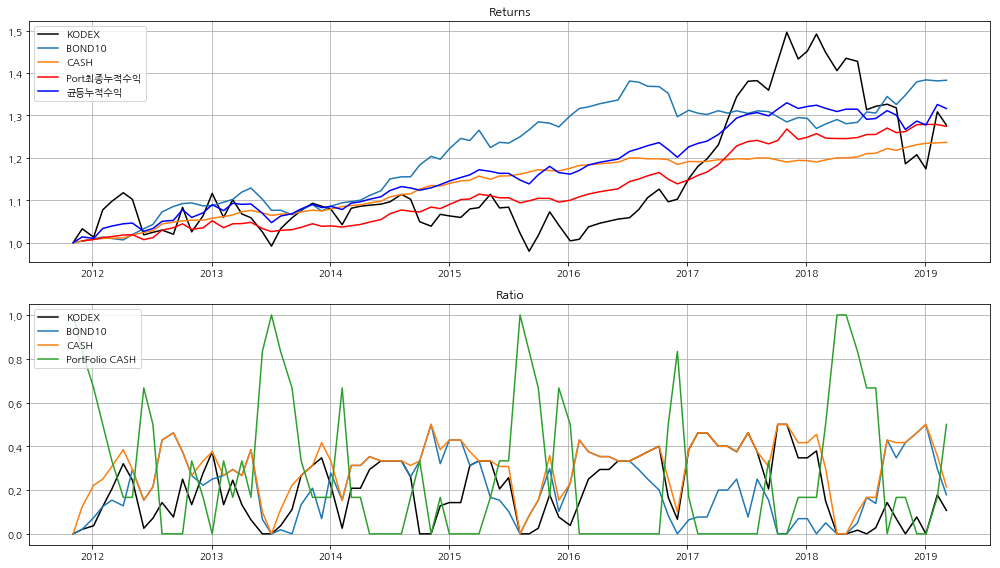

In [15]:
import matplotlib.pyplot as plt
#한글폰트사용하기
from matplotlib import rc, font_manager
import matplotlib
rc("font", family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.set_title("Returns")
ax1.plot(df_kodex_1week["Close"],color="Black",label="KODEX")
ax1.plot(df_bond10_1week["Close"],label="BOND10")
ax1.plot(df_bond3_1week["Close"],label="CASH")
ax1.plot(PortFolio["Port최종누적수익"],color="Red",label="Port최종누적수익")
ax1.plot(PortFolio["균등누적수익"],color="Blue",label="균등누적수익")
ax1.grid()
ax1.legend(loc=2)

ax2.set_title("Ratio")
ax2.plot(PortFolio["PortRatio"]*df_kodex_1week["Ratio"],color="Black", label="KODEX")
ax2.plot(PortFolio["PortRatio"]*df_bond10_1week["Ratio"], label="BOND10")
ax2.plot(PortFolio["PortRatio"]*df_bond3_1week["Ratio"], label="CASH")
ax2.plot(PortFolio["CashRatio"], label="PortFolio CASH")
ax2.grid()
ax2.legend(loc=2)

# 차트끼리 충돌을 방지합니다.
plt.tight_layout()
plt.show()